Université Paul Sabatier

EIMAB3H1 - Analyse et exploitation de données

Enseignant : **José G. Moreno**
Etudiant: KIRED Nour Elhouda


In [ ]:
! pip install pycountry


     |████████████████████████████████| 10.1 MB 7.4 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=c5523cb3d9b1c1ad77a691c9c373ed4acf193224ee3b3516919b142433340e1b
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
import numpy as np
import math
from scipy import linalg, mat, dot
import pycountry
from random import sample


TP 1. Similarité sémantique entre termes

Rappelez vous de l’équation Positive Pointwise Mutual Information (PPMI). 


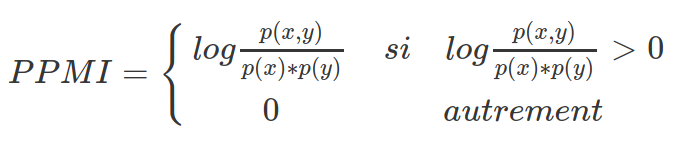

Elle permet de calculer des similarités entre mots. La premier étape consiste à calculer la fréquence entre mot ou la probabilité conjointe p(x,y). Ce calcul est fait dans un intervalle ou fenêtre, qui correspond à des partitions de l’information d’origine. L’utilisation d’une fenêtre glissante de taille fixe est très répandue. Dans ce cas, un nombre spécifique de mots sont considérés pour faire le calcule et puis la fenêtre se déplace sur la source. Considérez le suivant paragraphe:

> *A chaque ville, son explication. Les gares sur l’axe Atlantique (Toulouse, Tours et Bordeaux) ont par exemple été touchées par les travaux de la LGV Sud-Europe Atlantique, reliant Paris à Bordeaux en 2 h 4, inaugurée au début du mois de juillet. Toulouse, relié à Paris via Bordeaux en TGV, a donc fait les frais de cette entreprise, débutée en 2012.*


En savoir plus sur 
http://www.lemonde.fr/les-decodeurs/article/2017/08/02/tgv-un-taux-de-retards-stable-en-quatre-ans-mais-inegal-sur-le-territoire-francais_5167883_4355770.html#JQKswFWRoJgyDQrY.99


Si la taille de la fenêtre est égale à 5 mots avec un déplacement d’un mot entre fenêtres, les 4 premières fenêtres seront :
```
[A chaque ville son explication]
[chaque ville son explication Les]
[ville son explication Les gares]
[son explication Les gares sur]
...
```

Si on considérer que le paragraphe a 60 mots, il aura 59 fenêtres c’est-à-dire le nombre des mots moins un. Pour le calcule de $p(x,y)$ entre les mots Bordeaux et Toulouse,  $p(‘Bordeaux’,‘Toulouse’)$,  avec une fenêtre égale à 5 mots et 59 fenêtres, le valeur de $p(‘Bordeaux’,‘Toulouse’)$ sera égale à 2/59. 


1. Écrivez un script en python qui permettra calculer la fréquence entre deux mots avec une fenêtre glissante de taille fixe. 

In [2]:
def fenetreGlisant(texte,taille):
  partes = texte.split()
  partes2=[partes[i:i+taille] for i in range(len(texte)-1)]
  return partes2

montexte = "A chaque ville, son explication. Les gares sur l’axe Atlantique (Toulouse, Tours et Bordeaux) ont par exemple été touchées par les travaux de la LGV Sud-Europe Atlantique, reliant Paris à Bordeaux en 2 h 4, inaugurée au début du mois de juillet. Toulouse, relié à Paris via Bordeaux en TGV, a donc fait les frais de cette entreprise, débutée en 2012"
# netoyage du texte
montexte=montexte.replace(',','').replace('(','').replace(')','').replace('.','')
print(fenetreGlisant(montexte,5))


[['A', 'chaque', 'ville', 'son', 'explication'], ['chaque', 'ville', 'son', 'explication', 'Les'], ['ville', 'son', 'explication', 'Les', 'gares'], ['son', 'explication', 'Les', 'gares', 'sur'], ['explication', 'Les', 'gares', 'sur', 'l’axe'], ['Les', 'gares', 'sur', 'l’axe', 'Atlantique'], ['gares', 'sur', 'l’axe', 'Atlantique', 'Toulouse'], ['sur', 'l’axe', 'Atlantique', 'Toulouse', 'Tours'], ['l’axe', 'Atlantique', 'Toulouse', 'Tours', 'et'], ['Atlantique', 'Toulouse', 'Tours', 'et', 'Bordeaux'], ['Toulouse', 'Tours', 'et', 'Bordeaux', 'ont'], ['Tours', 'et', 'Bordeaux', 'ont', 'par'], ['et', 'Bordeaux', 'ont', 'par', 'exemple'], ['Bordeaux', 'ont', 'par', 'exemple', 'été'], ['ont', 'par', 'exemple', 'été', 'touchées'], ['par', 'exemple', 'été', 'touchées', 'par'], ['exemple', 'été', 'touchées', 'par', 'les'], ['été', 'touchées', 'par', 'les', 'travaux'], ['touchées', 'par', 'les', 'travaux', 'de'], ['par', 'les', 'travaux', 'de', 'la'], ['les', 'travaux', 'de', 'la', 'LGV'], ['trav

In [5]:
montexte.strip()

'A chaque ville son explication Les gares sur l’axe Atlantique Toulouse Tours et Bordeaux ont par exemple été touchées par les travaux de la LGV Sud-Europe Atlantique reliant Paris à Bordeaux en 2 h 4 inaugurée au début du mois de juillet Toulouse relié à Paris via Bordeaux en TGV a donc fait les frais de cette entreprise débutée en 2012'

2. Calculez les valeurs de PPMI entre mots pour tous les mots du paragraphe *« A chaque ville, son explication... »*.

In [ ]:
def calculerPPMI(px,py,pxy):
  pmi = pxy/(px*py)
  if pmi> 0:
     return (math.log(pmi))
  else:
     return 0

def calculerpx(mot,fenetres): ## nb d'apparition d'un mot dans une fenetre
  d : dict= {}
  for (i,fenetre) in enumerate(fenetres) :
    d[i]=fenetre.count(mot)
  n_app_word_all_ctxt=sum(d.values())
  n_tot= len(fenetres)
  return n_app_word_all_ctxt/n_tot

def calculerpxy(mot1,mot2,fenetres): # nb dapparition du mot1 et mot 2 dans une fenetre
  d=[1 if mot1 in fenetre and mot2 in fenetre else 0 for fenetre in fenetres]
  n_app_word1_word2=sum(d)
  n_tot= len(fenetres)
  return n_app_word1_word2/n_tot

fenetres = fenetreGlisant(montexte,5)
N=len(montexte)
M=np.zeros((N,N))
for i,mot1 in enumerate(montexte.split()):
  for j,mot2 in enumerate(montexte.split()):  
    PPMI=calculerPPMI(calculerpx(mot1,fenetres),calculerpx(mot2,fenetres),calculerpxy(mot1,mot2,fenetres))
    M[i][j]=PPMI
    print(mot1, mot2, PPMI)


A A 5.820082930352362
A chaque 5.126935749792416
A ville 4.721470641684252
A son 4.433788569232471
A explication 4.210645017918261
A Les 0
A gares 0
A sur 0
A l’axe 0
A Atlantique 0
A Toulouse 0
A Tours 0
A et 0
A Bordeaux 0
A ont 0
A par 0
A exemple 0
A été 0
A touchées 0
A par 0
A les 0
A travaux 0
A de 0
A la 0
A LGV 0
A Sud-Europe 0
A Atlantique 0
A reliant 0
A Paris 0
A à 0
A Bordeaux 0
A en 0
A 2 0
A h 0
A 4 0
A inaugurée 0
A au 0
A début 0
A du 0
A mois 0
A de 0
A juillet 0
A Toulouse 0
A relié 0
A à 0
A Paris 0
A via 0
A Bordeaux 0
A en 0
A TGV 0
A a 0
A donc 0
A fait 0
A les 0
A frais 0
A de 0
A cette 0
A entreprise 0
A débutée 0
A en 0
A 2012 0
chaque A 5.126935749792416
chaque chaque 5.126935749792416
chaque ville 4.721470641684252
chaque son 4.433788569232471
chaque explication 4.210645017918261
chaque Les 3.517497837358316
chaque gares 0
chaque sur 0
chaque l’axe 0
chaque Atlantique 0
chaque Toulouse 0
chaque Tours 0
chaque et 0
chaque Bordeaux 0
chaque ont 0
chaque par 0


In [ ]:
ppmi1 = calculerPPMI(calculerpxy('Toulouse','Bordeaux',fenetres),calculerpx('Toulouse',fenetres),calculerpx('Bordeaux',fenetres))
ppmi2 = calculerPPMI(calculerpxy('Toulouse','Tours',fenetres),calculerpx('Toulouse',fenetres),calculerpx('Tours',fenetres))
print(ppmi2)

3.740641388672526


3. Notez que vous avez construit une matrice de taille $N\times N$ (où $N$ est la talle du vocabulaire). Cette matrice ne peut pas être facilement visualisable car tous les éléments sont de dimension $N$. Cependant, il existe de méthodes pour projeter les donnes dans un dimension visualisable comme 2D ou 3D. En utilisant la méthode SVD, projetez votre matrice dans un espace de deux dimensions. En utilisant SVD en 2D, visualisez les points pour les villes (Toulouse, Tours et Bordeaux) et pour les marques ferroviaires (LGV et TGV) . Voici un exemple d’utilisation de la méthode SVD (les valeurs de X sont des exemples, il faut que vous calculez $X$ avec $PPMI$).

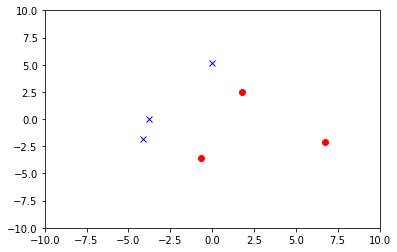

In [ ]:
#Celui-ci est un example pour vous montrer la visualization (ce n'est pas la réponse)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array([[-1, -1, -1, 0], [-2, -1, 0, 8], [-3, -2, 5, 1], [1, 1, 5, -1], [2, 1, 7, 1], [3, 2, -1, 0]])
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

red = [0,1,2]
bleu = [3,4,5]


plt.plot([x[0] for x in Xp[red]],[x[1] for x in Xp[red]], 'ro')
plt.plot([x[0] for x in Xp[bleu]],[x[1] for x in Xp[bleu]], 'bx')
plt.axis([-10, 10, -10, 10])
plt.savefig('foo.png')

In [ ]:
def get_index(mot,texte):
  return texte.index(mot)


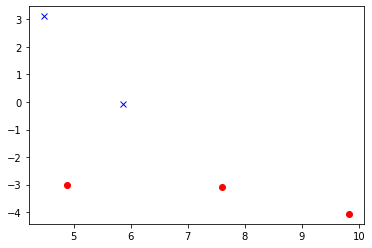

In [ ]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(M)

red = [get_index('Toulouse',montexte.split()),get_index('Bordeaux',montexte.split()),get_index('Tours',montexte.split())]
bleu = [get_index('LGV',montexte.split()),get_index('TGV',montexte.split())]


plt.plot([x[0] for x in Xp[red]],[x[1] for x in Xp[red]], 'ro')
plt.plot([x[0] for x in Xp[bleu]],[x[1] for x in Xp[bleu]], 'bx')

# plt.savefig('foo.png')

4. Si vous faites le même calcule sur toute la Wikipédia, croyez-vous que les points vont se placer différemment ? Pourquoi ?

5. Calculez une autre matrice de similarité entre mots comme vous l'avez fait par $PPMI$ mais en utilisant *Wordnet*. *Wordnet* est une ressource externe construite manuellement, donc plus riche et plus propre. Pour chaque mot, vous pouvez calculer sa similarité en analysant le chemin plus court entre synsets. Regardez les supports de cours si vous avez de doutes sur *Wordnet* et les concepts associés. Voici un exemple de comme utiliser *Wordnet* avec ```nltk``` pour calculer des similarités.

In [ ]:
# il faut télécharger la resource wordnet
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

synsa = wordnet.synsets("monday")[0] #premier sens de monday
synsb = wordnet.synsets("friday")[0] #premier sens de friday
synsc = wordnet.synsets("dog")[0] #premier sens de dog

print("Wordnet similarity between monday and friday: ", synsa.path_similarity(synsb))
print("Wordnet similarity between monday and dog: ", synsa.path_similarity(synsc))


Wordnet similarity between monday and friday:  0.3333333333333333
Wordnet similarity between monday and dog:  0.058823529411764705


6. Vous pouvez aussi visualiser la similarité en 2D en utilisant SVD. Calculez la matrice de similarité entre tous les jours de la semaine (Monday, Tuesday, etc.) et les mois de l’année (January, February, etc). La matrice doit faire $19\times 19$. Projetez cette matrice de similarité dans un espace de dimension 2 et visualisez les $19$ points comme vous l'avez fait précédemment. Notez vous des régularités ?

In [ ]:
Days= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']
Vocabulary= Days+Months
N=len(Vocabulary)
M_Days_Months=np.zeros((N,N))
for i,w1 in enumerate(Vocabulary):
  synsa = wordnet.synsets(w1)[0] 
  for j,w2 in enumerate(Vocabulary):
    M_Days_Months[i][j]= synsa.path_similarity(wordnet.synsets(w2)[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


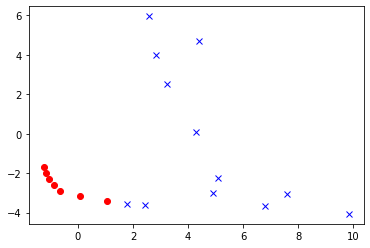

In [ ]:
# Plot
pca = PCA(n_components=2)
Xp = pca.fit_transform(M)

red = [np.arange(len(Days))] # Days
bleu = [np.arange(len(Days),N)] # Mois

plt.plot([x[0] for x in Xp[red]],[x[1] for x in Xp[red]], 'ro')
plt.plot([x[0] for x in Xp[bleu]],[x[1] for x in Xp[bleu]], 'bx')

# plt.savefig('foo.png')

7. Une nouvelle technique pour représenter les mots apparue récemment est connue comme word embeddings. Elle est basée sur les réseaux de neurones. Regardez les supports de cours pour plus de détails sur les word embeddings et les concepts associés. Une fois calculée cette représentation, elle permet d’avoir un vecteur par mot (comme nous avons fait en 2 et 3). Pour utiliser ces vecteurs il suffit de les télécharger. Par example les lignes de code suivantes nous permettent de télécharger les vecteurs glove.6B.50d.txt.zip. 

In [ ]:
!wget https://github.com/nate-parrott/squad/blob/master/data/glove.6B.50d.txt.zip?raw=true
!unzip glove.6B.50d.txt.zip\?raw\=true

--2021-09-26 11:20:19--  https://github.com/nate-parrott/squad/blob/master/data/glove.6B.50d.txt.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nate-parrott/squad/raw/master/data/glove.6B.50d.txt.zip [following]
--2021-09-26 11:20:19--  https://github.com/nate-parrott/squad/raw/master/data/glove.6B.50d.txt.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nate-parrott/squad/master/data/glove.6B.50d.txt.zip [following]
--2021-09-26 11:20:19--  https://raw.githubusercontent.com/nate-parrott/squad/master/data/glove.6B.50d.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:

8. Lisez le fichier (dans la variable ``` vect ``` et calculez le vecteur C =  ‘Paris’- ‘France’ + ‘Italy’ ( ou ``` c = vect['paris']-vect['france']+vect['italy'] ``` en python), puis triez uniquement les capitales européennes (dans la liste ci-dessous) en ordre descendant en utilisant la similarité cosinus. Notez vous des régularités ? Essayez avec des autres pays au lieu de l’Italie (utilisez les noms en anglais uniquement).

In [ ]:
#lecture du fichier...je vous la donne :)
vect = {w.split()[0]:np.array(w.split()[1:]).astype(float) for w in open('glove.6B.50d.txt').readlines()}

In [ ]:
c = vect['paris']-vect['france']+vect['italy']
capitales = [x.lower() for x in ['Tirana','Vienna','Minsk','Brussels','Sarajevo','Sofia','Zagreb','Nicosia','Prague','Copenhagen','Tallinn','Helsinki','Paris','Berlin','Gibraltar','Athens','Budapest','Reykjavik','Dublin','Douglas','Rome','Riga','Vaduz','Vilnius','Luxembourg','Skopje','Valletta','Monaco','Podgorica','Amsterdam','Oslo','Warsaw','Lisbon','Bucharest','Moscow','Belgrade','Bratislava','Ljubljana','Madrid','Stockholm','Bern','Kiev','London']]
similarity : dict = {}
for cap_city in capitales:
  a= vect[cap_city]
  similarity[(('Paris-France + Italy',cap_city))] = sum(a*c)/linalg.norm(np.array(a))/linalg.norm(np.array(c))

capitales_most_scores,scores=(list(zip(*[sorted(similarity.items(), key=lambda t: t[1],reverse=True)][0])))
# print(len(capitales_most_scores))
[print(cap[1],score) for cap,score in zip(capitales_most_scores,scores)]
print(capitales_most_scores)

rome 0.8378683673120781
paris 0.7518838903637358
madrid 0.7458326493468692
amsterdam 0.7108945482980599
lisbon 0.7107850880135039
budapest 0.6746922998113885
berlin 0.6611294070383436
prague 0.6531610599997235
vienna 0.6384447779259108
brussels 0.634112683619761
stockholm 0.627708007351197
bucharest 0.6250235971554946
athens 0.6049242720586935
sofia 0.5944546502030152
copenhagen 0.5862522944696013
luxembourg 0.5585849074418163
london 0.5573653604931906
monaco 0.5492257623575946
moscow 0.5331558130262183
bratislava 0.5102009023011683
helsinki 0.5091183525826734
ljubljana 0.5056645403826667
kiev 0.498673230249686
bern 0.49334095557773194
tirana 0.49123686436073005
nicosia 0.4805116305264372
warsaw 0.47604475682023767
tallinn 0.4706975129438775
belgrade 0.4435707029334247
dublin 0.43556399512703425
vilnius 0.3999950347357946
minsk 0.3909732416160123
zagreb 0.38461907807211293
riga 0.370378454982391
oslo 0.3633131035966015
skopje 0.33618319977129435
reykjavik 0.3336603020504705
vaduz 0.328

In [ ]:
countries= [country.name.replace(',','').lower() for country in list(pycountry.countries)]
samples_countries=sample(countries,10)
for country in samples_countries:
  c = vect['paris']-vect['france']+vect[country.split(' ')[0]]
  capitales = [x.lower() for x in ['Tirana','Vienna','Minsk','Brussels','Sarajevo','Sofia','Zagreb','Nicosia','Prague','Copenhagen','Tallinn','Helsinki','Paris','Berlin','Gibraltar','Athens','Budapest','Reykjavik','Dublin','Douglas','Rome','Riga','Vaduz','Vilnius','Luxembourg','Skopje','Valletta','Monaco','Podgorica','Amsterdam','Oslo','Warsaw','Lisbon','Bucharest','Moscow','Belgrade','Bratislava','Ljubljana','Madrid','Stockholm','Bern','Kiev','London']]
  similarity : dict = {}
  for cap_city in capitales:
    a= vect[cap_city]
    similarity[(('Paris-France + '+ str(country),cap_city))] = sum(a*c)/linalg.norm(np.array(a))/linalg.norm(np.array(c))

  capitales_most_scores,scores=(list(zip(*[sorted(similarity.items(), key=lambda t: t[1],reverse=True)][0])))
  # print(len(capitales_most_scores))
  [print(cap,score) for cap,score in zip(capitales_most_scores,scores)]
  # print(capitales_most_scores)


('Paris-France + morocco', 'stockholm') 0.5910715247378023
('Paris-France + morocco', 'amsterdam') 0.5677257309361293
('Paris-France + morocco', 'paris') 0.556081574429272
('Paris-France + morocco', 'vienna') 0.5444701642053877
('Paris-France + morocco', 'oslo') 0.5441282106319371
('Paris-France + morocco', 'rome') 0.5357552056184325
('Paris-France + morocco', 'belgrade') 0.5237265340426595
('Paris-France + morocco', 'madrid') 0.519144769531333
('Paris-France + morocco', 'lisbon') 0.5163244926853137
('Paris-France + morocco', 'copenhagen') 0.511919766731753
('Paris-France + morocco', 'sofia') 0.505497739992814
('Paris-France + morocco', 'prague') 0.5044557832568085
('Paris-France + morocco', 'budapest') 0.489817935957128
('Paris-France + morocco', 'vilnius') 0.48403224146316404
('Paris-France + morocco', 'riga') 0.4837597571101681
('Paris-France + morocco', 'moscow') 0.4823316385029225
('Paris-France + morocco', 'nicosia') 0.48172777967925984
('Paris-France + morocco', 'zagreb') 0.4808